In [2]:
#导入所需要的库
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
#将自变量和因变量数据提取
data = pd.read_csv(r'United.csv')

In [4]:
data

,性别,年龄,BMI,潮气量（L）,用力肺活量（%）,中心气道参数（%）,FEV1/FVC（%）,最高呼气流速（%）,外周气道参数A（%）,外周气道参数B（%）,外周气道参数C（%）,外周气道参数D（%）,阴阳性
0,1,40,21.629649,1.34,99.159664,88.010204,73.093220,95.021645,59.225513,64.661654,105.070423,76.190476,0
1,1,55,21.490286,1.16,104.778157,93.360996,73.289902,83.994334,48.466258,59.870550,101.844262,83.653846,0
2,1,30,21.061628,1.33,102.259887,91.176471,74.217311,80.942828,65.650407,64.519906,103.146067,107.100592,0
3,1,25,23.407509,2.28,93.796992,82.812500,74.348697,77.358491,58.039216,62.237762,104.092072,92.814371,0
4,1,23,20.177149,1.63,92.260692,80.476190,74.613687,71.221532,55.069583,54.024390,74.943567,48.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,0,36,21.513859,1.14,84.873950,90.967742,93.069307,91.285714,83.143508,96.875000,102.512563,100.000000,1
6516,1,28,20.305175,1.50,86.654479,99.781182,96.202532,92.141454,108.514852,102.870264,63.942308,82.269504,1
6517,0,36,21.484375,1.31,75.153374,84.751773,97.551020,57.488654,75.586854,64.957265,58.203125,54.585153,1
6518,0,60,29.270994,0.87,82.625483,97.247706,99.065421,90.394511,120.625000,100.957854,72.000000,48.529412,1


In [5]:
data.info()#这里如果看到缺失值要处理

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6520 entries, 0 to 6519
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   性别           6520 non-null   int64  
 1   年龄           6520 non-null   int64  
 2   BMI          6520 non-null   float64
 3   潮气量（L）       6520 non-null   float64
 4   用力肺活量（%）     6520 non-null   float64
 5   中心气道参数（%）    6520 non-null   float64
 6   FEV1/FVC（%）  6520 non-null   float64
 7   最高呼气流速（%）    6520 non-null   float64
 8   外周气道参数A（%）   6520 non-null   float64
 9   外周气道参数B（%）   6520 non-null   float64
 10  外周气道参数C（%）   6520 non-null   float64
 11  外周气道参数D（%）   6520 non-null   float64
 12  阴阳性          6520 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 662.3 KB


In [7]:
#填充缺失值
data.loc[:,"潮气量（L） "] = data.loc[:,"潮气量（L） "].fillna(data.loc[:,"潮气量（L） "].median()) 

In [8]:
data=data.dropna()#如果缺失值数量较少，则用此函数直接删除

In [17]:
X = data.iloc[:,data.columns != '阴阳性']
y = data.iloc[:,data.columns == '阴阳性']
X.drop(['潮气量（L） '],inplace=True,axis=1)#筛选特征，去掉“潮气量”列

C:\Windows\Temp\ipykernel_2172\1948303175.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['潮气量（L） '],inplace=True,axis=1)#筛选特征，去掉“潮气量”列


In [11]:
#将性别“男”“女”转换为数字变量
labels = data["性别"].unique().tolist()
data["性别"] = data["性别"].apply(lambda x:labels.index(x))

In [12]:
labels = data["性别"].unique().tolist()

In [13]:
data

,性别,年龄,BMI,潮气量（L）,用力肺活量（%）,中心气道参数（%）,FEV1/FVC（%）,最高呼气流速（%）,外周气道参数A（%）,外周气道参数B（%）,外周气道参数C（%）,外周气道参数D（%）,阴阳性
0,0,40,21.629649,1.34,99.159664,88.010204,73.093220,95.021645,59.225513,64.661654,105.070423,76.190476,0
1,0,55,21.490286,1.16,104.778157,93.360996,73.289902,83.994334,48.466258,59.870550,101.844262,83.653846,0
2,0,30,21.061628,1.33,102.259887,91.176471,74.217311,80.942828,65.650407,64.519906,103.146067,107.100592,0
3,0,25,23.407509,2.28,93.796992,82.812500,74.348697,77.358491,58.039216,62.237762,104.092072,92.814371,0
4,0,23,20.177149,1.63,92.260692,80.476190,74.613687,71.221532,55.069583,54.024390,74.943567,48.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,1,36,21.513859,1.14,84.873950,90.967742,93.069307,91.285714,83.143508,96.875000,102.512563,100.000000,1
6516,0,28,20.305175,1.50,86.654479,99.781182,96.202532,92.141454,108.514852,102.870264,63.942308,82.269504,1
6517,1,36,21.484375,1.31,75.153374,84.751773,97.551020,57.488654,75.586854,64.957265,58.203125,54.585153,1
6518,1,60,29.270994,0.87,82.625483,97.247706,99.065421,90.394511,120.625000,100.957854,72.000000,48.529412,1


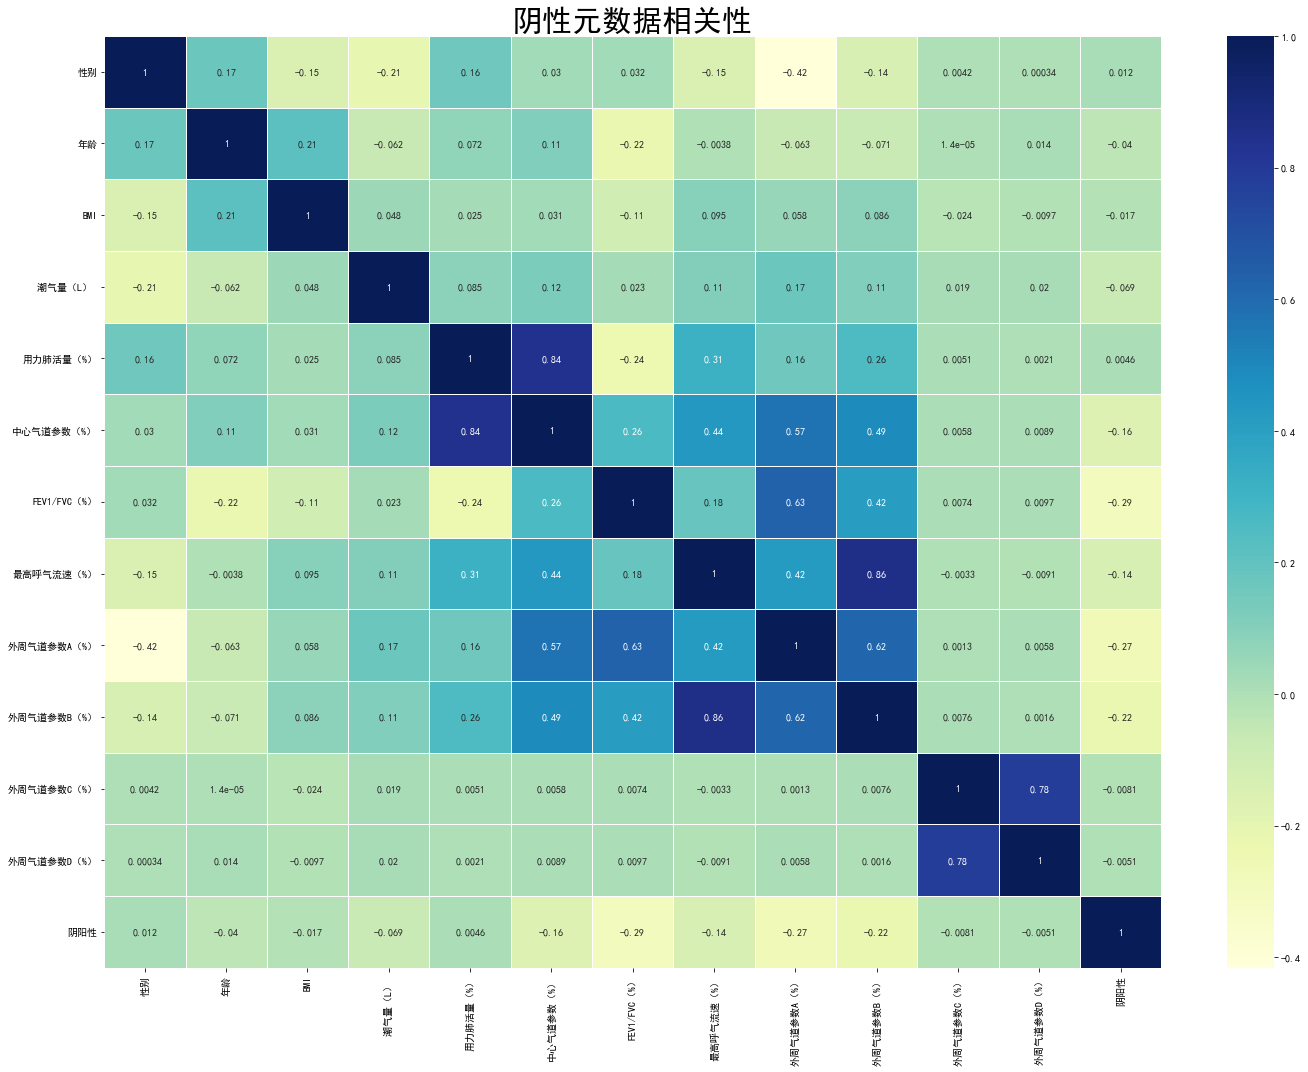

In [19]:
#绘制相关性矩阵
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['figure.figsize'] = (20, 15) 
sns.heatmap(data.corr(), annot = True, linewidths=.5, cmap="YlGnBu") #df.corr()计算相关性
plt.title('阴性元数据相关性', fontsize = 30)
plt.tight_layout()

In [25]:
#导入库，索引重新排序，划分训练集和测试集，计算准确率
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)##训练集0.7,测试集0.3
for i in [Xtrain, Xtest, Ytrain ,Ytest]:
    i.index = range(i.shape[0])            #索引重新排序，纠正索引非常必要，避免在之后的代码中出现混乱

clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

#网格搜索：能够帮助我们同时调整多个参数的技术，枚举技术。缺点：由于一个一个试，
#所以非常耗时间，需要清除参数在某个范围内
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)#0-0.5之间有顺序的排列数（随机的）
#entropy_thresholds = np.linspace(0,1,50)

#parameters本质是一串参数和这些参数对应的，我们希望网格搜索来搜索参数的取值范围
parameters = {'criterion':('gini','entropy')
              ,'splitter':('best','random')
              ,'max_depth':[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':np.linspace(0,0.5,20)
    
}


clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain, Ytrain)
#网格搜索不一定调的高，网格搜索真的很慢，参数要想好了

#输出准确率最高的参数以及对应的准确率
print(GS.best_params_)
print(GS.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'splitter': 'random'}
0.7721256094283849


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import tree
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)
clf = DecisionTreeClassifier(criterion = "gini"
                                 ,random_state=31
                                 ,splitter='random'
                                 ,max_depth=3
                                 ,min_samples_leaf=1#用来限制叶子结点的重要性参数
                                ,min_impurity_decrease=0#限制信息增益（父节点和子节点之间的差值）大小，信息增益小于设定数值的分枝不会发生
                                  
                                 )#实例化，使用交叉熵,控制随机性,rs可以随便选
clf = clf.fit(Xtrain, Ytrain)                                
score = clf.score(Xtest, Ytest)#返回预测的准确度度accurancy
print(score)

0.7765848670756647


In [27]:
feature_name = ['Sex','Age','BMI',"ELC","CAP","FEV1/FVC","MEFR","PAP-A","PAP-B","PAP-C","PAP-D"]
import pydotplus
import graphviz
dot_data = tree.export_graphviz(clf#实例化特征
                                ,feature_names = feature_name
                                ,class_names=["-","+"]#逗号写在前面，方便注解
                                ,filled=True #是否填充颜色，颜色越深表示不纯度越高  ！！！需要理解决策树原理
                                ,rounded=True #框有角，框的形状
)
#graph = graphviz.Source(dot_data)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("tree2.pdf")#决策树输出为PDF
#不纯度为0时可以产生标签类别，树变宽，因为随机性增加

[*zip(feature_name,clf.feature_importances_)]

[('Sex', 0.0),
 ('Age', 0.03175935870137751),
 ('BMI', 0.0),
 ('ELC', 0.0),
 ('CAP', 0.0),
 ('FEV1/FVC', 0.9246007642150926),
 ('MEFR', 0.029817191142983906),
 ('PAP-A', 0.013822685940545844),
 ('PAP-B', 0.0),
 ('PAP-C', 0.0),
 ('PAP-D', 0.0)]

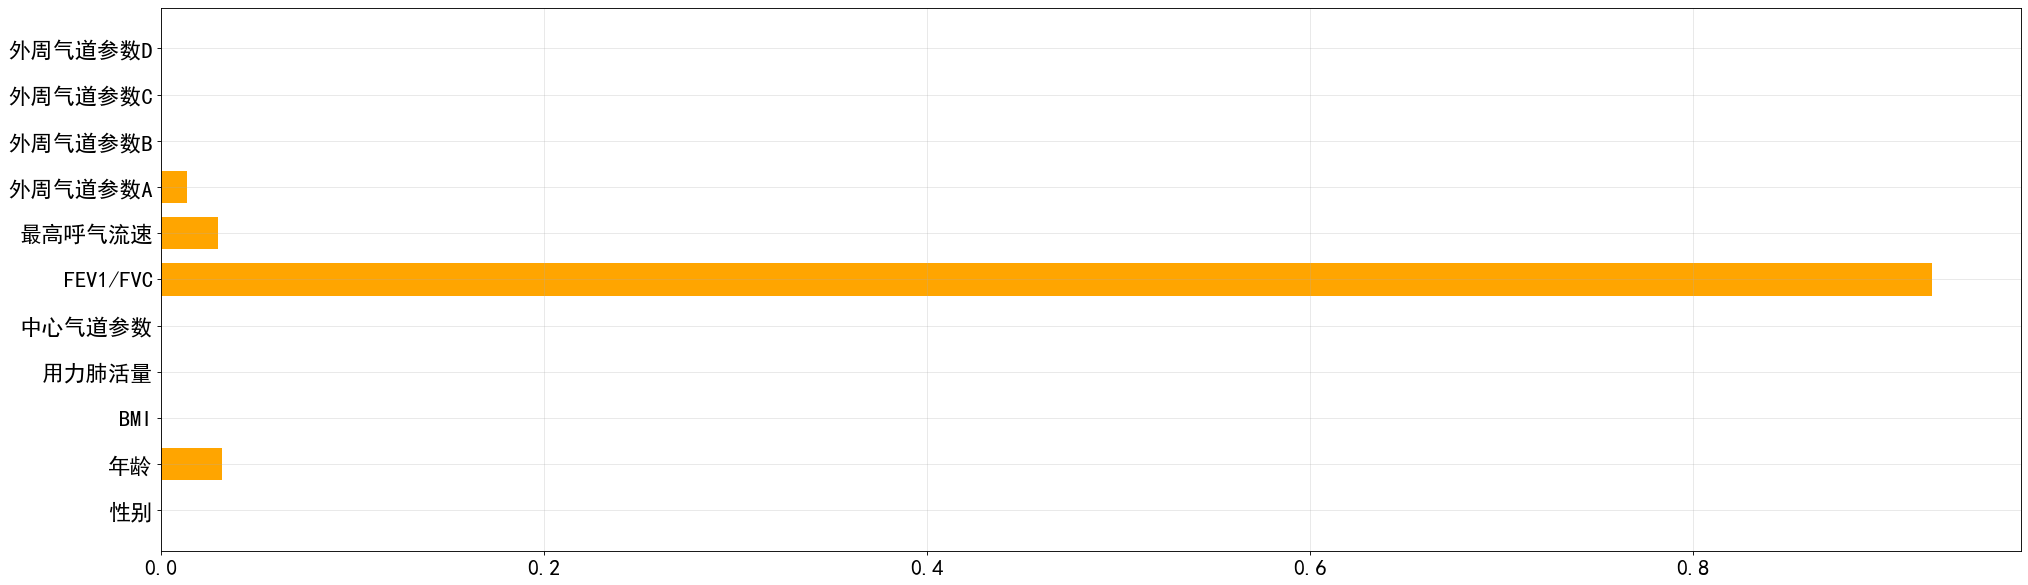

In [28]:
#绘制横着的条形图
from matplotlib import pyplot as plt

#支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


a = ["性别","年龄","BMI","用力肺活量","中心气道参数","FEV1/FVC","最高呼气流速","外周气道参数A","外周气道参数B","外周气道参数C","外周气道参数D"]

b=[0,0.032,0,0,0,0.925,0.03,0.014,0,0,0]


#设置图形大小
plt.figure(figsize=(30,9),dpi=80)
#绘制条形图
plt.barh(range(len(a)),b,height=0.7,color="orange")#x,y轴不用变
#设置字符串到x轴
plt.yticks(range(len(a)),a)
plt.tick_params(labelsize=20)
plt.grid(alpha=0.3)
# plt.savefig("./movie.png")

plt.show()